In [46]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky as cs, tools_delens, tools_lens, tools_multitracer, tqdm, binning as bn
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
olmax = 2048
elmin, elmax = 50, 2048
klmin, klmax = 20, 2048

In [3]:
pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='base_roll50')
pid = prjlib.analysis_init(t='id',ntype='cv')

In [14]:
W, __ = prjlib.window('la',ascale=5.,nside=2048) # apodized window already multiplied to phi alms

In [15]:
Wsa, __ = prjlib.window('sa')
Wla, __ = prjlib.window('la',ascale=0.)
Wsa *= hp.pixelfunc.ud_grade(Wla,512)
M = W**2/(W**2+1e-60)

SAT mask is further multiplied by hit-count binary


In [37]:
Al = (np.loadtxt(qobj.f['TT'].al)).T[1]
wfac = np.sum(Al[:klmax+1]*(2*np.linspace(0,klmax,klmax+1)+1)/4./np.pi)

In [50]:
rho = {n: np.loadtxt('misc/test_mass_'+n+'.dat',unpack=True) for n in ['m','w','I','iso_m','iso_w','iso_wm','iso_ww'] }

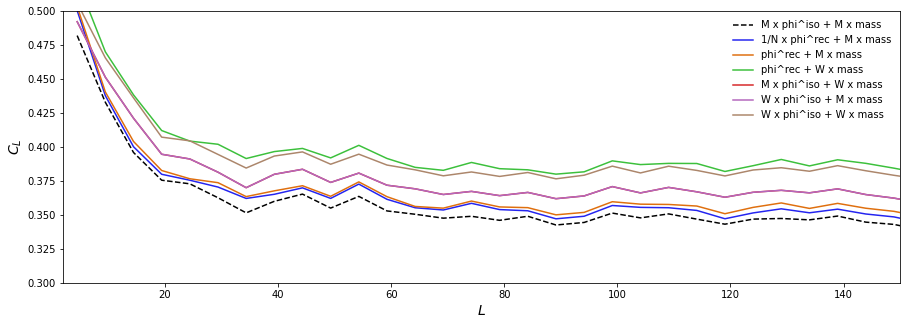

In [51]:
mb = bn.multipole_binning(100,lmin=2,lmax=500)
pl.plot_1dstyle(fsize=[15,5],xmin=2,xmax=150,ymin=.3,ymax=.5)
plot(mb.bc,1-bn.binning(rho['iso_m'],mb),label='M x phi^iso + M x mass',color='k',ls='--')
plot(mb.bc,1-bn.binning(rho['I'],mb),label='1/N x phi^rec + M x mass')
plot(mb.bc,1-bn.binning(rho['m'],mb),label='phi^rec + M x mass')
plot(mb.bc,1-bn.binning(rho['w'],mb),label='phi^rec + W x mass')
plot(mb.bc,1-bn.binning(rho['iso_w'],mb),label='M x phi^iso + W x mass')
plot(mb.bc,1-bn.binning(rho['iso_wm'],mb),label='W x phi^iso + M x mass')
plot(mb.bc,1-bn.binning(rho['iso_ww'],mb),label='W x phi^iso + W x mass')
legend()